In [1]:
from Net.actorCritic import A2C
import Net.networks as net
from Env.env import *
from Obs.obs import *
import torch

pygame 2.1.2 (SDL 2.0.18, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
RESOLUTION = 32
game_params = dict(feature_screen=RESOLUTION, feature_minimap=RESOLUTION, action_space="FEATURES") 
game_names = {1:'MoveToBeacon',
              2:'CollectMineralShards',
              3:'DefeatRoaches',
              4:'FindAndDefeatZerglings',
              5:'DefeatZerglingsAndBanelings',
              6:'CollectMineralsAndGas',
              7:'BuildMarines'
              }
map_name = game_names[1]
screen_names = ['player_relative', 'selected', 'unit_density', 'unit_density_aa']
minimap_names = []
obs_proc_params = {'screen_names':screen_names, 'minimap_names':minimap_names, 'select_all':False}
action_names = ['no_op', 'select_army', 'Move_screen']
action_dict = get_action_dict(action_names)
spatial_model = net.SpatialFeatures
nonspatial_model = net.NonSpatialFeatures_v1

n_channels = 32
n_features = 256

n_steps = 40
max_n_steps = 2001
steps_count = 100
loss_freq = 50


In [3]:
op = ObsProcesser(**obs_proc_params)
in_channels = np.sum(op.get_n_channels())
spatial_dict = {'in_channels':in_channels}
nonspatial_dict = {'resolution':RESOLUTION}

In [4]:
en = init_game(game_params, map_name)


agent = torch.load("Results\\MoveToBeacon\\4\\model.pth")
mean_rw_history = torch.load("Results\\MoveToBeacon\\4\\mean_rw_history.pth")
loss_history = torch.load("Results\\MoveToBeacon\\4\\loss_history.pth")

In [5]:
agent = A2C(en, spatial_model, nonspatial_model, spatial_dict, nonspatial_dict, n_features, n_channels, action_dict=action_dict,
           gamma=0.99, beta=0.7, eta=-0.001)

In [6]:
en.close()

In [7]:
test_env = Env(game_params, map_name, obs_proc_params, action_dict)
env = Env(game_params, map_name, obs_proc_params, action_dict)

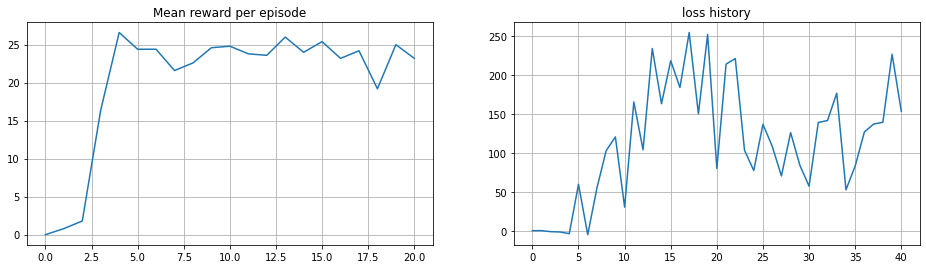

100%|██████████████████████████████████████████████████████████████████████████████| 2001/2001 [38:19<00:00,  1.15s/it]


In [8]:
train(agent, test_env, env, map_name, n_steps, max_n_steps, steps_count, loss_freq)

In [9]:
env.close()

In [10]:
evaluate(test_env, agent, 25)

22.96

In [11]:
test_env.close()